**PREDICTING ELECTRIC VEHICLE RANGE BASED ON FEATURES**

**Importing necessary libraries**

In [8]:
import warnings 
warnings.simplefilter(action='ignore',category = FutureWarning)

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV 
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint
import joblib

**Loading the dataset**

In [13]:
dataset = 'https://drive.google.com/uc?export=download&id=1DJjmRVDKebArtQ6qYmHgbB9hAe-HkfqP'

In [16]:
df = pd.read_csv(dataset)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


# Exploring the data 

In [21]:
#Checking the basic informations about the dataset
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 no

In [22]:
print("Shape of the dataset:")
df.shape

Shape of the dataset:


(235692, 17)

In [23]:
print("Columns of the dataset:")
print(df.columns)

Columns of the dataset:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


DATA PREPROCESSING & ANALYSIS

Handling Missing Values

In [26]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dty

In [27]:
print("null value percentage:")
null_percentage=(df.isnull().sum()/len(df))*100
print(null_percentage)

null value percentage:
VIN (1-10)                                           0.000000
County                                               0.001273
City                                                 0.001273
State                                                0.000000
Postal Code                                          0.001273
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.015274
Base MSRP                                            0.015274
Legislative District                                 0.209596
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004243
Electric Utility                               

In [28]:
# Using imputation method to handle null values 
# numerical columns
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].median())
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].median())
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].median())
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(df['2020 Census Tract'].median())

In [29]:
# categorical columns
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

In [30]:
print("Null values of the dataset:")
print(df.isnull().sum())

Null values of the dataset:
VIN (1-10)                                            0
County                                                0
City                                                  0
State                                                 0
Postal Code                                           0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                  0
DOL Vehicle ID                                        0
Vehicle Location                                     10
Electric Utility                                      0
2020 Census Tract                                     0
dtype: int64


Handling Duplicates

In [32]:
df.duplicated().sum()

0

The data not have any duplicated entries.

In [34]:
# we don't need the 'VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location' columns for further processing.so we are dropping the columns.
columns_to_drop = ['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [35]:
# Checking the columns after dropping the columns 
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Utility',
       '2020 Census Tract'],
      dtype='object')

In [36]:
# Checking descriptive statistics
print("statistical summary:")
df.describe()

statistical summary:


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract
count,235692.000000,235692.000000,235692.000000,235692.000000,235692.000000,2.356920e+05
mean,98177.655805,2021.406658,46.255503,787.148079,28.886059,5.298066e+10
std,2524.202602,2.991908,84.041354,7177.126712,14.889700,1.521056e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,5.602100e+10


# Handling Skewness

In [38]:
# Differentiating Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
Numerical Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract']


In [39]:
# To check the skewness of the data
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Compute skewness
skewness_values = df[columns].skew()
print("skewness of the columns:\n",skewness_values)

skewness of the columns:
 Postal Code            -29.436486
Model Year              -1.269370
Electric Range           1.848887
Base MSRP               15.790610
Legislative District    -0.431552
2020 Census Tract      -27.733378
dtype: float64


The dataset is asymmetrical.so we choose IQR method for outlier detection 

Handling outliers

In [42]:
# Columns to check for outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, columns):
    outliers = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers_iqr = detect_outliers_iqr(df, columns)

# Display outliers
for col, outlier_values in outliers_iqr.items():
    print(f"Outliers in {col}:\n{outlier_values}\n")

Outliers in Postal Code:
19        98908.0
31        98908.0
34        98942.0
44        98902.0
51        98908.0
           ...   
235675    99019.0
235676    99206.0
235677    99208.0
235682    99352.0
235683    99362.0
Name: Postal Code, Length: 15349, dtype: float64

Outliers in Model Year:
5         2012
26        2013
28        2013
118       2012
132       2013
          ... 
235445    2013
235486    2012
235498    2013
235518    2013
235678    2013
Name: Model Year, Length: 6455, dtype: int64

Outliers in Electric Range:
0         220.0
1         291.0
5         265.0
8         215.0
9         215.0
          ...  
235656    220.0
235658    259.0
235660    291.0
235681    249.0
235688    249.0
Name: Electric Range, Length: 38754, dtype: float64

Outliers in Base MSRP:
5         59900.0
46        69900.0
56        31950.0
101       44100.0
139       32250.0
           ...   
235566    31950.0
235573    69900.0
235614    52900.0
235621    31950.0
235636    31950.0
Name: Base MSR

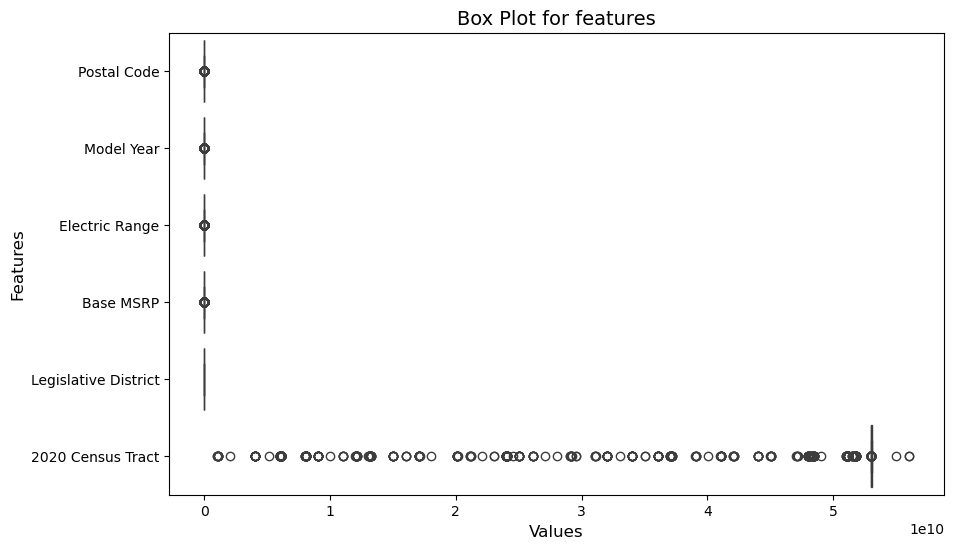

In [43]:
#Visualise the outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Plotting the Box Plot for Electric Range"
plt.figure(figsize=(10, 6))

# Box plot for Electric Range" (excluding NaN values)
sns.boxplot(df[columns], orient='h')

# Adding title and labels
plt.title('Box Plot for features', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

In [44]:
# Using capping method for handling outliers instead of outlier removal
# columns for capping outliers
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        lower_bound = df[col].quantile(0.01)
        upper_bound = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)  # Capping outliers
    return df

# Apply capping
df_capped = cap_outliers(df, columns)

print(df_capped)

           County          City State  Postal Code  Model Year     Make  \
0            King       Seattle    WA      98178.0        2019    TESLA   
1          Kitsap       Poulsbo    WA      98370.0        2020    TESLA   
2          Kitsap        Olalla    WA      98359.0        2023  HYUNDAI   
3          Kitsap       Seabeck    WA      98380.0        2021      BMW   
4        Thurston       Rainier    WA      98576.0        2023   TOYOTA   
...           ...           ...   ...          ...         ...      ...   
235687     Pierce        Tacoma    WA      98407.0        2024     JEEP   
235688  Snohomish      Stanwood    WA      98292.0        2018    TESLA   
235689       King       Redmond    WA      98052.0        2015     FORD   
235690  Snohomish  Lake Stevens    WA      98258.0        2023     AUDI   
235691       King      Issaquah    WA      98027.0        2023      BMW   

             Model                   Electric Vehicle Type  \
0          MODEL 3          Battery E

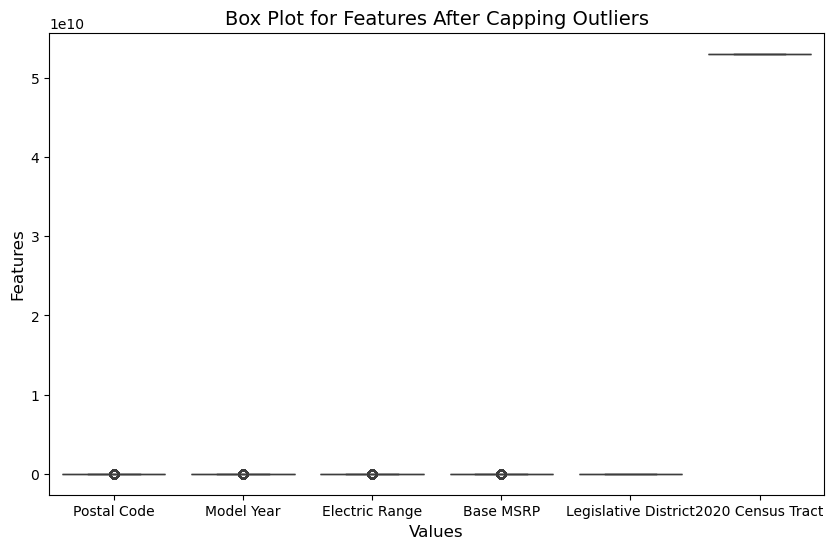

In [45]:
# Plotting the Box Plot after capping
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_capped[columns])  # No 'orient' needed
plt.title('Box Plot for Features After Capping Outliers', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

In [46]:
# displaying the cleaned data(df)
df_capped.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
0,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,PUGET SOUND ENERGY INC,5.303509e+10
2,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,PUGET SOUND ENERGY INC,5.303509e+10
3,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,PUGET SOUND ENERGY INC,5.303509e+10
4,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,PUGET SOUND ENERGY INC,5.306701e+10


In [47]:
# Data shape after the capping method
df_capped.shape

(235692, 14)

The outliers are handled properly.

In [49]:
# Check skewness after outlier handling 
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District','2020 Census Tract']

# Compute skewness
skewness_values = df_capped[columns].skew()
print("skewness of the columns:\n",skewness_values)

skewness of the columns:
 Postal Code             1.751481
Model Year             -1.196215
Electric Range          1.831257
Base MSRP               8.406651
Legislative District   -0.431552
2020 Census Tract       0.210353
dtype: float64


The skewness is still high in some columns ,so applied log transformation and Square root transformation methods for specific columns.

Skewness of the columns:
 Postal Code             1.751481
Model Year             -1.196215
Electric Range          1.831257
Base MSRP               8.406651
Legislative District   -0.431552
2020 Census Tract       0.210353
dtype: float64


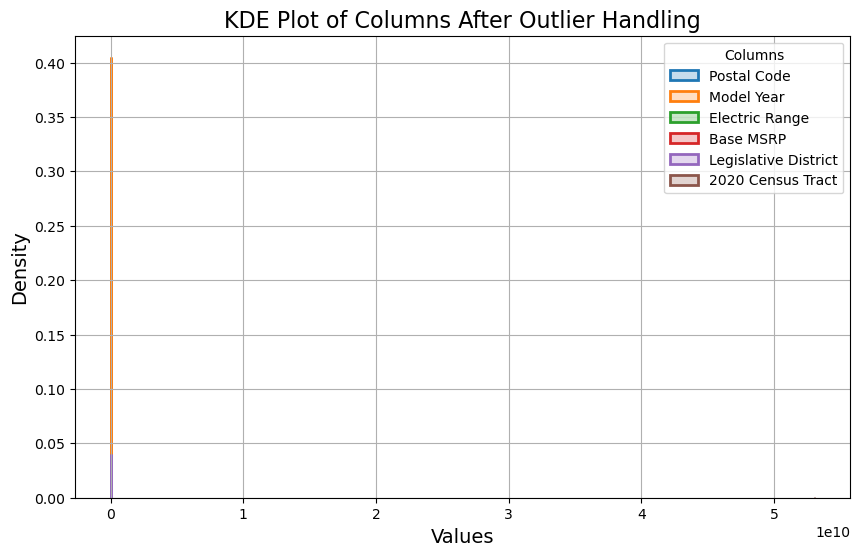

In [51]:
# Columns to check
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
           'Legislative District', '2020 Census Tract']

# Compute skewness
skewness_values = df_capped[columns].skew()
print("Skewness of the columns:\n", skewness_values)

# KDE Plot
plt.figure(figsize=(10, 6))

for col in columns:
    sns.kdeplot(df_capped[col], label=col, fill=True, linewidth=2)

plt.title('KDE Plot of Columns After Outlier Handling', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Columns')
plt.grid(True)
plt.show()


In [52]:
# Log transformation method 
# List of columns
columns = ['Postal Code', 'Electric Range', 'Base MSRP']

# Apply log transformation (log1p handles zeros well)
df_capped[columns] = df_capped[columns].apply(np.log1p)


# Compute skewness after log transformation
skewness_values = df_capped[columns].skew()
print("Skewness of the columns after log transformation:\n", skewness_values)


Skewness of the columns after log transformation:
 Postal Code       1.743600
Electric Range    0.628256
Base MSRP         8.335578
dtype: float64


In [53]:
# Square root transformation method 

# List of columns
columns = [ 'Model Year',
           'Legislative District']

# Apply square root transformation
df_capped[columns] = df_capped[columns].apply(np.sqrt)

# Compute skewness after square root transformation
skewness_values = df_capped[columns].skew()
print("Skewness of the columns after square root transformation:\n", skewness_values)


Skewness of the columns after square root transformation:
 Model Year             -1.197565
Legislative District   -0.927775
dtype: float64


There is a slight difference in skewness .

DATA ANALYSIS

Exploratory Data Analysis (EDA)

In [57]:
# checking unique values
unique__values=[]
for column in df_capped.columns:
  count=df_capped[column].value_counts().count()
  unique__values.append(count)
pd.DataFrame(unique__values,index=df_capped.columns,columns=["Total Unique Values"])

,Total Unique Values
County,212
City,788
State,48
Postal Code,554
Model Year,13
Make,46
Model,171
Electric Vehicle Type,2
Clean Alternative Fuel Vehicle (CAFV) Eligibility,3
Electric Range,106


# Uni-variate analysis 

In [59]:
# Taking a random sample of 50,000 rows from the DataFrame df_new
df_random = df_capped.sample(n=50000, random_state=42)  # random_state ensures reproducibility

# Displaying the final dataframe for further analysis and model building
df_random.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
99117,Clark,Vancouver,WA,11.499709,44.922155,VOLVO,S90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,3.091042,0.0,4.123106,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
71440,King,Normandy Park,WA,11.494425,44.966654,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,0.0,5.744563,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
100012,Snohomish,Arlington,WA,11.495006,44.877611,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,2.995732,0.0,6.244998,PUGET SOUND ENERGY INC,5.306105e+10
91904,Thurston,Olympia,WA,11.497832,44.977772,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,0.0,4.690416,PUGET SOUND ENERGY INC,5.306701e+10
123868,King,Renton,WA,11.493314,44.988888,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,3.258097,0.0,3.316625,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


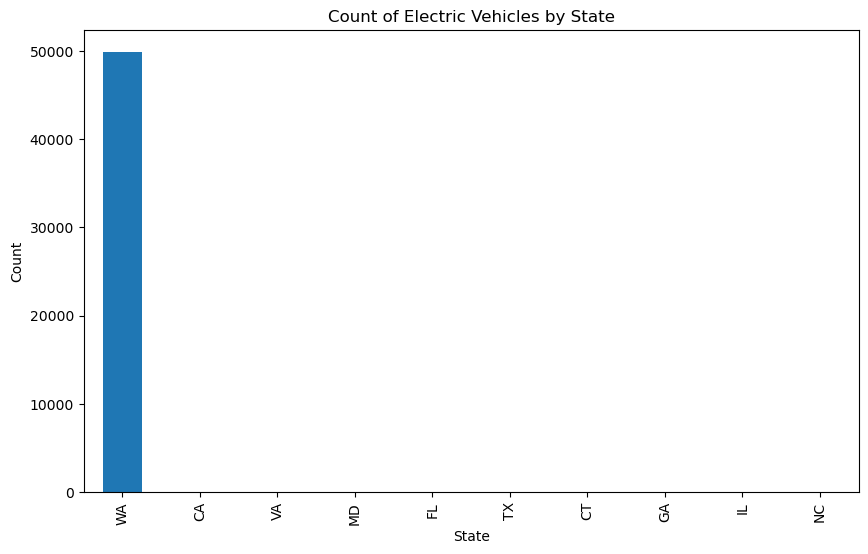

In [60]:
# Distribution of number of Electric Vehicles by State
plt.figure(figsize=(10, 6))
df_random['State'].value_counts().head(10).plot(kind='bar')
plt.title("Count of Electric Vehicles by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

Insights:
• The most number of electric vehicles are in WA (Washington state)

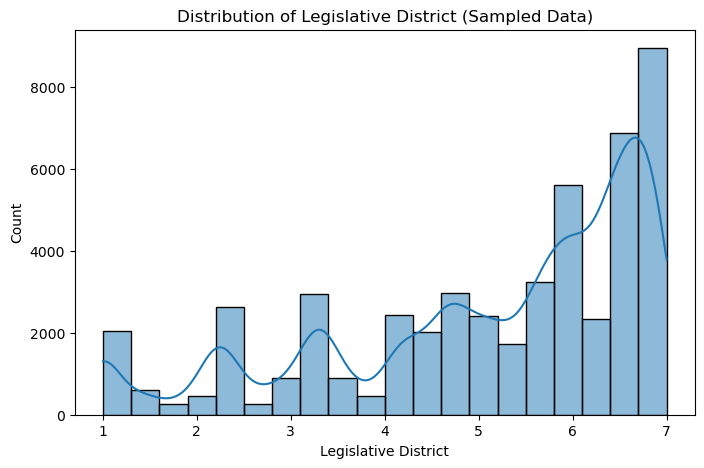

In [64]:
# Histogram of Legislative District
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Legislative District'], bins=20, kde=True)
plt.title("Distribution of Legislative District (Sampled Data)")
plt.show()

Insights:

• Peaks in the histogram show districts with higher EV registrations.

• Flat or low bars show districts with lower or no registrations.

• The KDE curve gives a smoothed view of this distribution pattern.

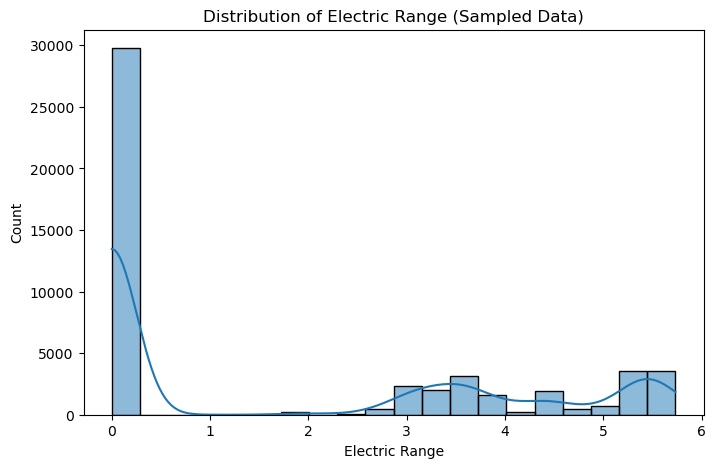

In [66]:
# Histogram of Electric Range with a sample
plt.figure(figsize=(8, 5))
sns.histplot(df_random['Electric Range'], bins=20, kde=True)
plt.title("Distribution of Electric Range (Sampled Data)")
plt.show()

Insights:
• Most vehicles have a lower Electric Range, with a few models offering much higher ranges.

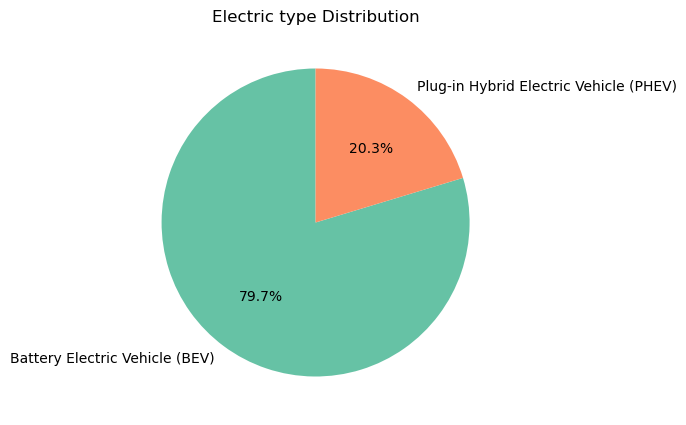

In [68]:
# Pie Diagram for Electric Vehicle Types(percentage distribution)
plt.figure(figsize=(8, 5))
df_random['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], startangle=90)
plt.title("Electric type Distribution")
plt.ylabel("")  # Remove y-axis label
plt.show()

Insights:
• In this diagram, most of the electric vehicles are BEV type (Battery electric vehicle-79.7%).

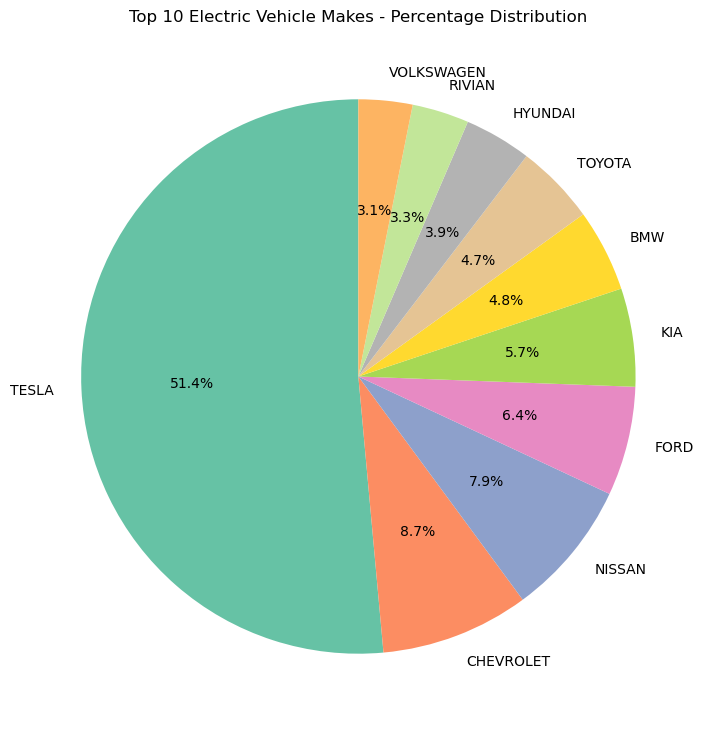

In [70]:
# Pie Chart showing Top 10 Electric Vehicle Makes by Percentage
plt.figure(figsize=(9, 9))
df_random['Make'].value_counts(normalize=True).head(10).plot.pie(
    autopct='%1.1f%%',
    colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#c2e699', '#fdb462'],
    startangle=90
)
plt.title("Top 10 Electric Vehicle Makes - Percentage Distribution")
plt.ylabel("")  # Hides the default y-axis label
plt.show()

Insights:
• Tesla is the most number Electric vehicle makers 51.4%.

# BI-Variate analysis 

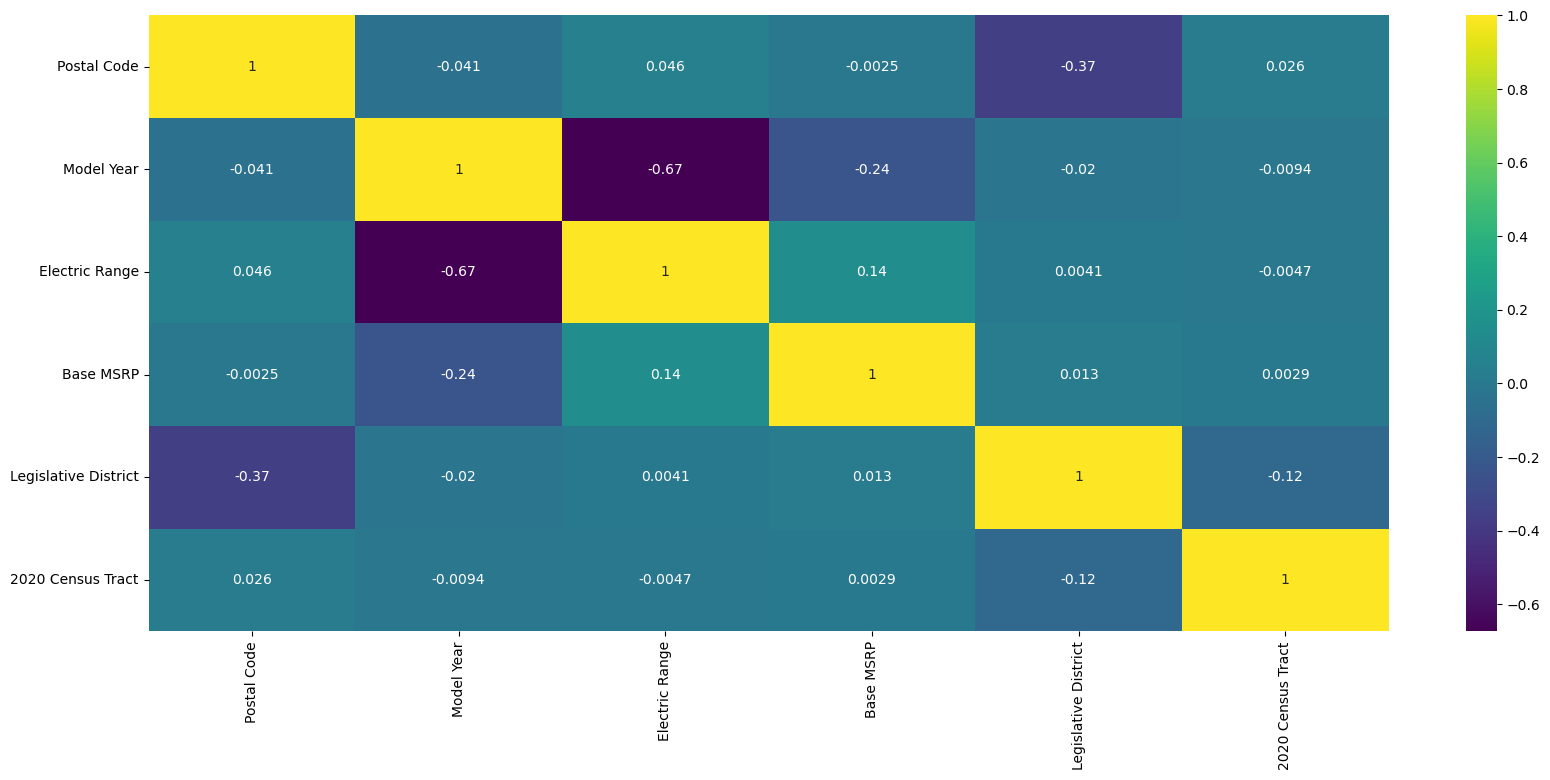

In [73]:
#Correlation matrix : Relationship between the numerical columns 
# Compute the correlation matrix
correlation_matrix = df_random.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Formatting
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show plot
plt.show()

Insights:
The heatmap uses colors to represent strength and direction of correlations:

• **Base MSRP** vs **Electric Range**: A moderate to strong correlation may indicate that more expensive EVs have longer ranges.

• **Model Year** vs **Electric Range**: Newer models might show better efficiency or improved technology, leading to longer ranges.

• **Electric Utility** or **Postal Code** vs **Electric Range**: Might reveal regional infrastructure effects (e.g., availability of chargers or subsidies).

• The correlation matrix shows that some features have moderate relationships, while most numerical columns are weakly correlated with each other. In the correlation metrix, there is no multicollinearity.

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Only for numerical columns
X_numeric = df_random.select_dtypes(include=['float64', 'int64'])
X_numeric = add_constant(X_numeric)  # Add intercept

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_numeric.columns
vif["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif)


                Feature       VIF
0                 const  0.000000
1           Postal Code  1.159070
2            Model Year  1.903811
3        Electric Range  1.834284
4             Base MSRP  1.059464
5  Legislative District  1.171866
6     2020 Census Tract  1.014187


Insights:
• VIF = 1 → No multicollinearity

• VIF 1–5 → Moderate (usually acceptable)

• VIF > 5 or 10 → Strong multicollinearity, consider removing or transforming features
  there is no multicollinearity.

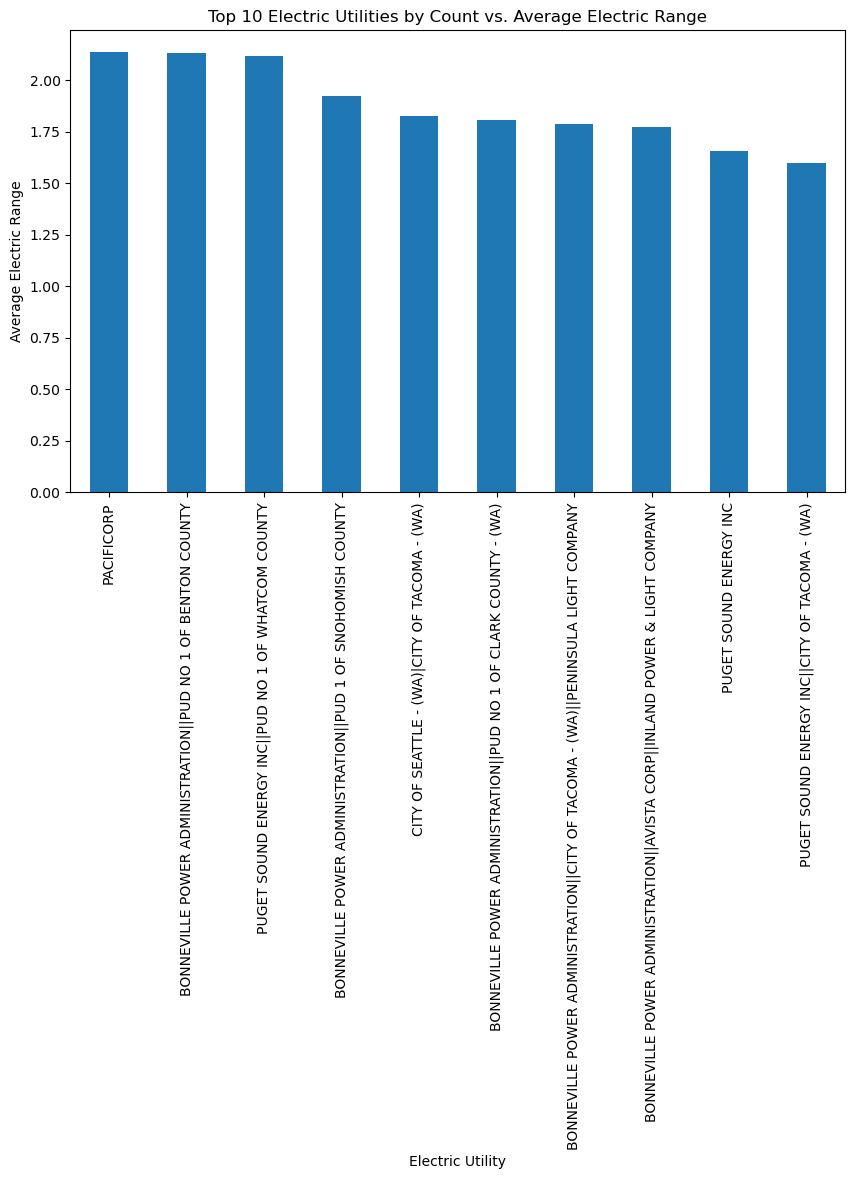

In [77]:
# Top 10 Electric Utilities by number of vehicles and their average Electric Range
plt.figure(figsize=(10, 6))

# Count the top 10 most common Electric Utilities
top_utilities = df_random['Electric Utility'].value_counts().head(10).index

# Filter the DataFrame for those top utilities
filtered_df = df_random[df_random['Electric Utility'].isin(top_utilities)]

# Group by Electric Utility and compute average Electric Range
avg_range_by_utility = filtered_df.groupby('Electric Utility')['Electric Range'].mean().sort_values(ascending=False)

# Plot
avg_range_by_utility.plot(kind='bar')
plt.title("Top 10 Electric Utilities by Count vs. Average Electric Range")
plt.xlabel("Electric Utility")
plt.ylabel("Average Electric Range")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Insights: 
Variation in Range: Different electric utilities show significant variation in the average electric range of EVs.

Popularity ≠ High Range: The most popular utilities (by vehicle count) do not always offer the highest average electric range.

Impact of Infrastructure: Utilities with better EV infrastructure or incentives may be linked to vehicles with longer ranges.

Urban vs Rural Patterns: Lower average ranges may indicate urban areas with shorter travel needs; higher ranges may reflect rural/suburban usage.

Policy Insights: Differences highlight potential areas where targeted policies or improvements could support longer-range EV usage.

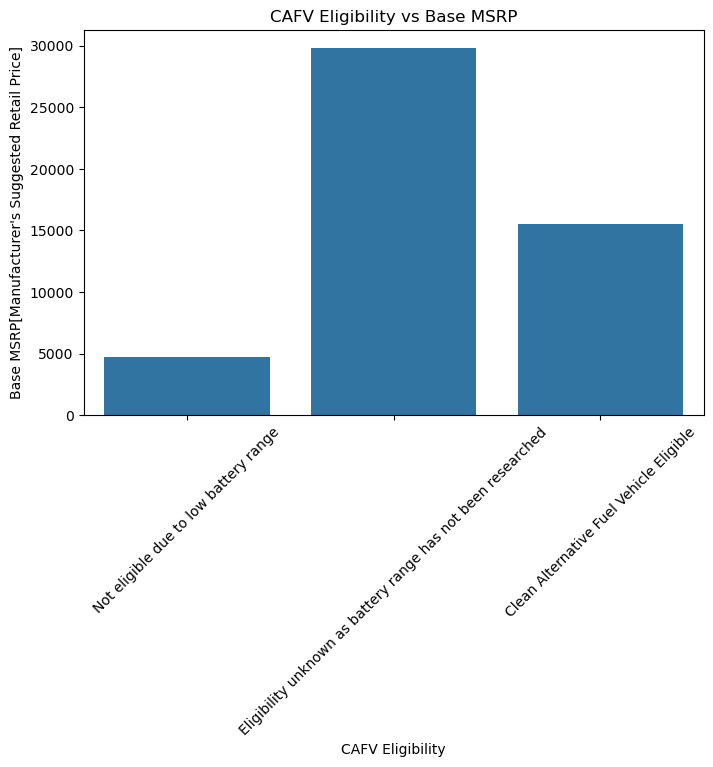

In [81]:
# Clean Alternative Fuel Vehicle (CAFV) Eligibility vs Base MSRP
plt.figure(figsize=(8, 5))
sns.countplot(x=df_random['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
plt.title("CAFV Eligibility vs Base MSRP")
plt.xlabel("CAFV Eligibility")
plt.ylabel("Base MSRP[Manufacturer's Suggested Retail Price]")
plt.xticks(rotation=45)
plt.show()

Insights:
• Most vehicles are CAFV eligible.

• Non-CAFV eligible vehicles tend to have lower Base MSRP.

• CAFV eligible vehicles generally have higher Base MSRP due to advanced technologies.

The data shows a focus on clean energy, with CAFV vehicles priced higher for their environmental benefits.

# multivariate analysis

<Figure size 800x600 with 0 Axes>

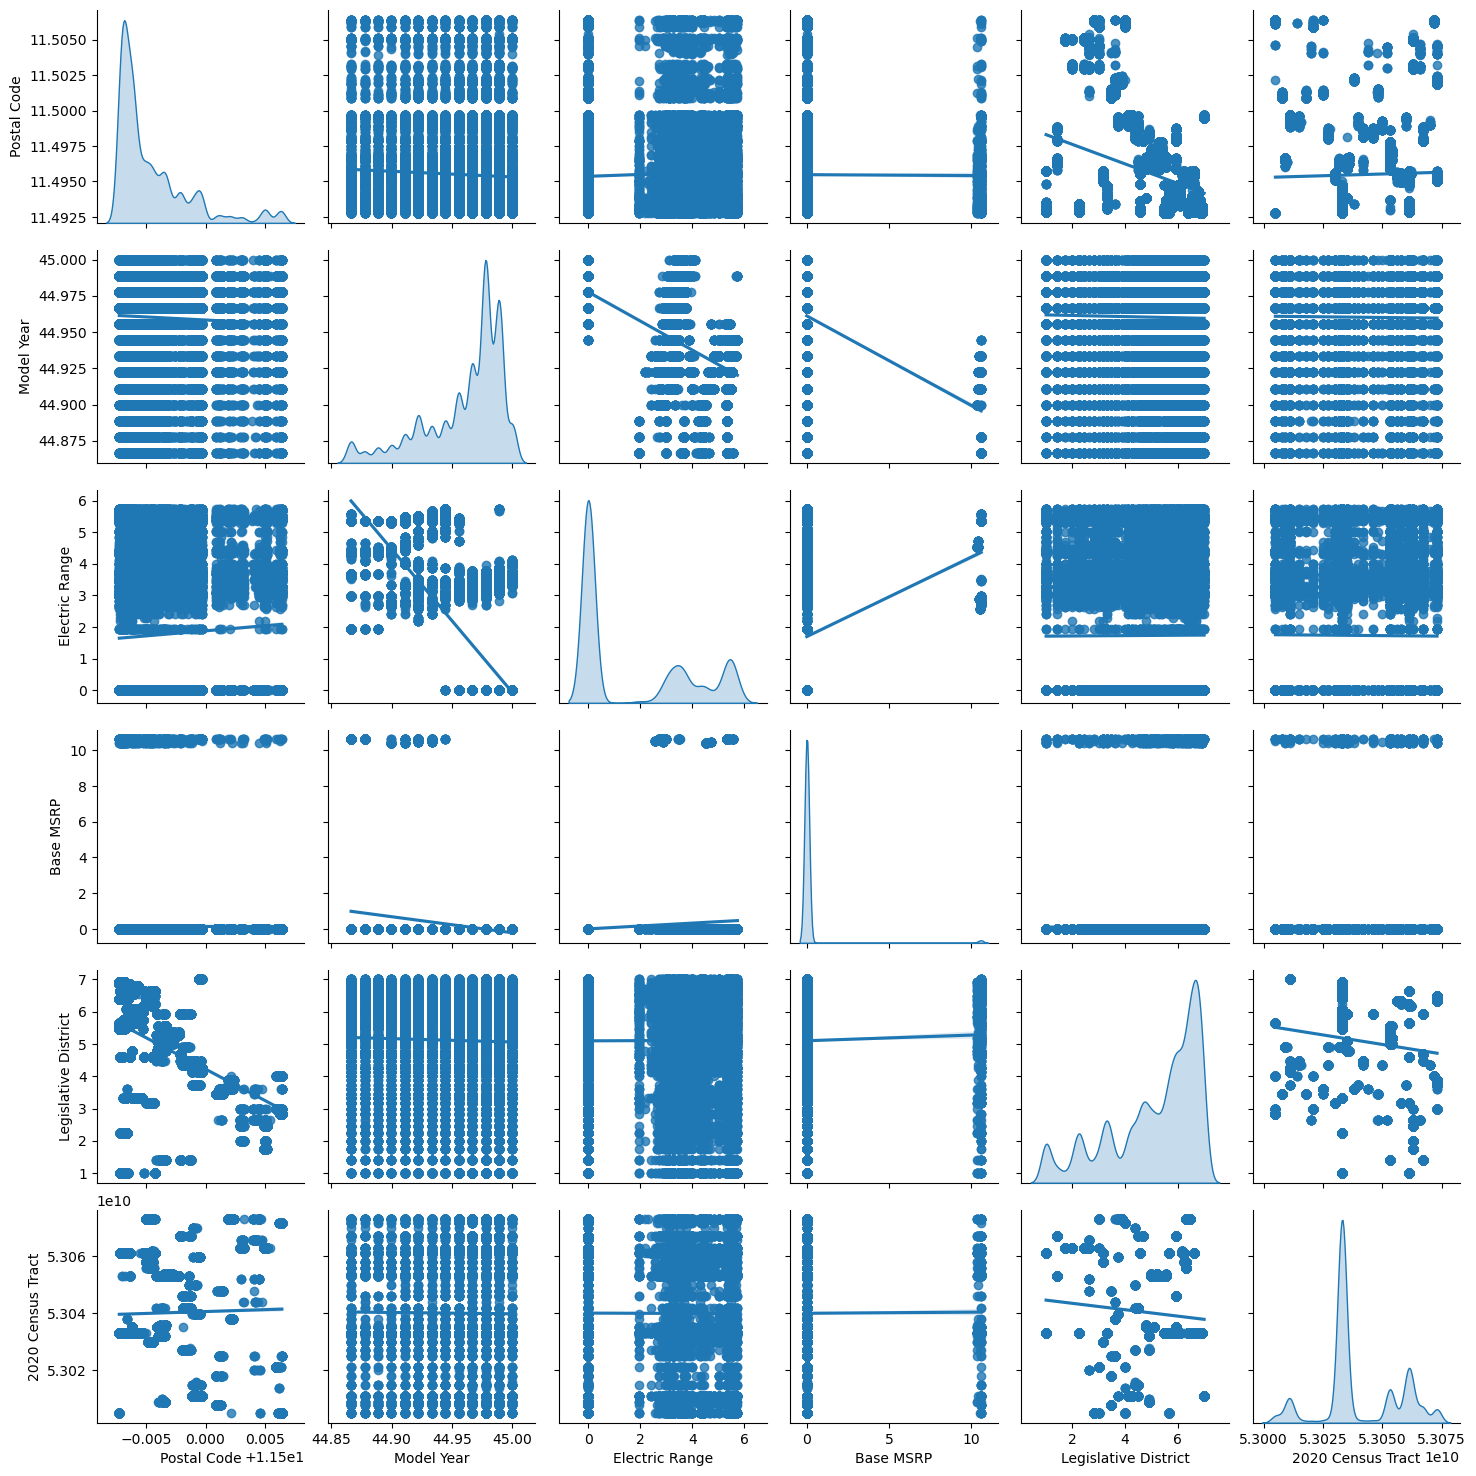

In [84]:
# pairplot
plt.figure(figsize=(8,6))
sns.pairplot(df_random,kind="reg",diag_kind="kde")
plt.show()

Insights
• We can see how the data is distributed among different features and how the features are related to each other.
• Some variables show linear or slightly curved relationships, especially between Base MSRP and Electric Range, suggesting potential for  
  regression modeling.
• There may be positive or negative correlations between Electric Range and other features like Model Year, Base MSRP, and possibly numerical 
  encodings.
• The diagonal plots (KDE) show the distribution of each numerical variable; for instance, if Electric Range is right-skewed, it indicates more 
  vehicles with lower range.

FEATURE ENGINEERING

Encoding categorical data

Encoding is the process of converting categorical or textual data into numerical formats. Most of the Machine Learning models can not work directly with non-numerical data, so encoding is one of the most essential steps to transform the data for Machine Learning algorithms.

In [89]:
# For displaying the categorical columns in the data set 
categorical_columns=df_capped.select_dtypes(include=["object","category"]).columns.tolist()

print("Categorical_columns:",categorical_columns)

Categorical_columns: ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']


The objective of selecting target encoding is to convert categorical variables into numerical values by encoding each category with the mean of the target variable for that category. This helps improve model performance, especially for high-cardinality categorical features.

Key reasons:
✅ Handles many unique categories better than one-hot encoding.

✅ Captures relationship between category and target.

✅ Reduces dimensionality vs. one-hot encoding.

✅ Often improves accuracy for tree-based models like Random Forest or Gradient Boosting.

In [91]:
# Using Target encoding 
categorical_columns = df_capped.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical_columns:", categorical_columns)

# Target encoding for each categorical column
for col in categorical_columns:
    # Calculate mean of target for each category
    target_mean = df_capped.groupby(col)['Electric Range'].mean()
    # Map the mean target to the original column
    df_capped[col + '_target_enc'] = df_capped[col].map(target_mean)

df_capped.head()

Categorical_columns: ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']


,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,...,Electric Utility,2020 Census Tract,County_target_enc,City_target_enc,State_target_enc,Make_target_enc,Model_target_enc,Electric Vehicle Type_target_enc,Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc,Electric Utility_target_enc
0,King,Seattle,WA,11.494548,44.933284,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,5.398163,...,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,1.667922,1.823852,1.741785,1.370054,2.081009,1.315182,4.666095,1.811334
1,Kitsap,Poulsbo,WA,11.496501,44.944410,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,5.676754,...,PUGET SOUND ENERGY INC,5.303509e+10,1.915357,2.043248,1.741785,1.370054,0.272583,1.315182,4.666095,1.685687
2,Kitsap,Olalla,WA,11.496389,44.977772,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.000000,...,PUGET SOUND ENERGY INC,5.303509e+10,1.915357,1.201196,1.741785,0.771093,0.000000,1.315182,0.000000,1.685687
3,Kitsap,Seabeck,WA,11.496603,44.955534,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,3.433987,...,PUGET SOUND ENERGY INC,5.303509e+10,1.915357,1.796044,1.741785,2.383125,3.399547,3.382774,4.666095,1.685687
4,Thurston,Rainier,WA,11.498593,44.977772,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,3.761200,...,PUGET SOUND ENERGY INC,5.306701e+10,1.895613,2.145491,1.741785,2.902048,3.761200,3.382774,4.666095,1.685687


In [92]:
# Drop irrelevant columns
columns_to_drop = ['County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [93]:
df_capped.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', '2020 Census Tract', 'County_target_enc',
       'City_target_enc', 'State_target_enc', 'Make_target_enc',
       'Model_target_enc', 'Electric Vehicle Type_target_enc',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc',
       'Electric Utility_target_enc'],
      dtype='object')

In [94]:
df_capped.shape 

(235692, 14)

 After encoding and removing irrelevant columns, we obtained 14 features. To avoid overfitting or underfitting, it's important to select the most relevant features for training the machine learning model. However, I chose not to perform feature selection and instead used all available features for model building

In [96]:
# Selecting the first 100 rows
correlation_matrix = df_capped.corr(numeric_only=True)
print(correlation_matrix.corr()["Electric Range"].sort_values(ascending=False))

Electric Range                                                  1.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc    0.996143
Model_target_enc                                                0.942366
Make_target_enc                                                 0.710760
Electric Vehicle Type_target_enc                                0.691854
Base MSRP                                                       0.244464
City_target_enc                                                 0.011387
County_target_enc                                              -0.064793
Postal Code                                                    -0.065940
Legislative District                                           -0.067932
Electric Utility_target_enc                                    -0.072545
2020 Census Tract                                              -0.132285
State_target_enc                                               -0.137388
Model Year                                         

For model building and evaluation, I chose 50,000 rows from the dataset because it contains more than 200,000 rows, and processing the entire dataset takes too much time.

In [100]:
# Taking a random sample of 50,000 rows 
df_sample= df_capped.sample(n=50000, random_state=42)  # random_state ensures reproducibility

# Displaying the final dataframe for further analysis and model building
df_sample.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract,County_target_enc,City_target_enc,State_target_enc,Make_target_enc,Model_target_enc,Electric Vehicle Type_target_enc,Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc,Electric Utility_target_enc
99117,11.499709,44.922155,3.091042,0.0,4.123106,5.301104e+10,1.854945,1.879886,1.741785,2.189079,3.234172,3.382774,3.031446,1.853361
71440,11.494425,44.966654,0.000000,0.0,5.744563,5.303303e+10,1.667922,2.157755,1.741785,1.370054,0.272583,1.315182,0.000000,1.591271
100012,11.495006,44.877611,2.995732,0.0,6.244998,5.306105e+10,1.518212,1.817825,1.741785,1.005898,3.060149,3.382774,3.031446,1.685687
91904,11.497832,44.977772,0.000000,0.0,4.690416,5.306701e+10,1.895613,1.945691,1.741785,0.835673,0.000000,1.315182,0.000000,1.685687
123868,11.493314,44.988888,3.258097,0.0,3.316625,5.303303e+10,1.667922,1.699624,1.741785,3.144377,3.258097,3.382774,3.031446,1.591271


# Split Data into Training and Testing Sets

In [102]:
X = df_sample.drop(columns=["Electric Range"])  # Features
y = df_sample["Electric Range"]  # Target

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("\n Training data (Features):")
print(X_train)
print("\n Testing data (Features):")
print(X_test)


 Training data (Features):
        Postal Code  Model Year  Base MSRP  Legislative District  \
74810     11.493070   44.977772        0.0              6.928203   
207576    11.493967   44.888751        0.0              6.000000   
95475     11.499475   44.944410        0.0              7.000000   
130365    11.499556   44.988888        0.0              4.242641   
44836     11.499668   44.977772        0.0              4.123106   
...             ...         ...        ...                   ...   
28006     11.494446   44.966654        0.0              5.744563   
124459    11.495362   44.933284        0.0              6.633250   
64311     11.506414   44.911023        0.0              2.828427   
121186    11.495067   44.988888        0.0              6.324555   
107168    11.499709   44.988888        0.0              4.123106   

        2020 Census Tract  County_target_enc  City_target_enc  \
74810        5.303302e+10           1.667922         1.670779   
207576       5.303301e+10

In [104]:
X_train.shape 

(40000, 13)

In [105]:
X_test.shape 

(10000, 13)

# Feature scaling 

Standardization:Standardization allows the model to learn better by equalizing feature ranges, avoiding biases that arise from unbalanced ranges.Standand Scaler and Min Max Scaler are the most commonly used scaling methods. Here I am going to use standard scaler method.

In [108]:
scaler_standard=StandardScaler()
X_train_scaled=scaler_standard.fit_transform(X_train)
X_test_scaled=scaler_standard.transform(X_test)

In [109]:
print("\n  X _train_scaled:")
print(X_train_scaled)
print("\n X_test_scaled:")
print(X_test_scaled)


  X _train_scaled:
[[-0.76441648  0.53629739 -0.11741666 ... -0.50378625 -0.80404175
  -0.84069301]
 [-0.48034696 -2.19332038 -0.11741666 ... -0.50378625  1.36952459
   0.38556634]
 [ 1.26366605 -0.4866757  -0.11741666 ... -0.50378625  1.36952459
   0.61975246]
 ...
 [ 3.46053385 -1.5104087  -0.11741666 ... -0.50378625  1.36952459
   1.5294588 ]
 [-0.13206417  0.87711984 -0.11741666 ... -0.50378625 -0.80404175
   2.28216648]
 [ 1.33746192  0.87711984 -0.11741666 ... -0.50378625 -0.80404175
   0.61975246]]

 X_test_scaled:
[[-0.40614351  0.19539069 -0.11741666 ... -0.50378625 -0.80404175
   0.38556634]
 [-0.63203419  0.87711984 -0.11741666 ... -0.50378625 -0.80404175
  -0.84069301]
 [-0.14495671 -0.14560031 -0.11741666 ... -0.50378625 -0.80404175
   2.28216648]
 ...
 [ 3.00769864  0.87711984 -0.11741666 ... -0.50378625 -0.80404175
   0.58214935]
 [ 3.46053385  0.53629739 -0.11741666 ... -0.50378625 -0.80404175
   1.5294588 ]
 [ 1.26366605  0.53629739 -0.11741666 ... -0.50378625 -0.8040

**BUILD THE MACHINE LEARNING MODELS**

In [111]:
# It is a Regression problem. The Regression models are:
models={
       "Linear Regression": LinearRegression(),
       "Decision Tree Regressor": DecisionTreeRegressor(),
       "K-Nearest Neighbour Regressor":KNeighborsRegressor(),
       "Random Forest Regressor": RandomForestRegressor(),
       "Gradient Boosting Regressor":GradientBoostingRegressor()
}

**MODEL EVALUATION**

In [113]:
model_results={}
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    predictions=model.predict(X_test_scaled)
    mae=mean_absolute_error(y_test,predictions)
    mse=mean_squared_error(y_test,predictions)
    r2=r2_score(y_test,predictions)
    rmse = np.sqrt(mse)
    model_results[name]={"MAE":mae,"MSE":mse,"R2":r2,"RMSE":rmse}

**Model Comparison**

In [116]:
results_df = pd.DataFrame.from_dict(model_results, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Optional: display the DataFrame
results_df

,Model,MAE,MSE,R2,RMSE
0,Linear Regression,0.228901,0.124871,0.974309,0.353371
1,Decision Tree Regressor,0.003503,0.002203,0.999547,0.046932
2,K-Nearest Neighbour Regressor,0.033681,0.015077,0.996898,0.122787
3,Random Forest Regressor,0.003828,0.002183,0.999551,0.046723
4,Gradient Boosting Regressor,0.031792,0.007418,0.998474,0.086127


**Insights**
•Random Forest Regressor model shows the Highest R2 score of 99.96%, indicating strong predictive capabilities.
•Decision Tree Regressor & Gradient Boosting Regressor models hold the second and third highest R2 scores (99.95% and 99.84%).
•K-Nearest Neighbors regressor is performing well with a 99.68% R2 score.
•Linear Regression is the least performing model compared to others. It shows an R2 score of 97.43% only.

**Analysing the models for over fitting**

# Regularization
Regularization is a technique in machine learning used to prevent overfitting by adding a penalty to the loss function. This ensures that the model generalizes well to unseen data. Examples for common types of regularization: L1 (Lasso) and L2 (Ridge).

In [120]:
# Overfitting Linear regression using Ridge (L2 regularization)
lin_reg = Ridge(alpha=0.1, max_iter=1000)
lin_reg.fit(X_train_scaled, y_train)
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

In [121]:
print("Overfitted Linear Regression - Train R2 score:", r2_score(y_train, y_train_pred))
print("Linear Regression with L2 - Test R2 score:", r2_score(y_test, y_test_pred))

Overfitted Linear Regression - Train R2 score: 0.9754596506157324
Linear Regression with L2 - Test R2 score: 0.9743094886390818


In [122]:
#Overfitting K-Nearest Neighbour Regression 
KNN_reg=KNeighborsRegressor(n_neighbors=4)
KNN_reg.fit(X_train_scaled, y_train)
y_train_pred = KNN_reg.predict(X_train_scaled)
y_test_pred = KNN_reg.predict(X_test_scaled)

In [123]:
print("Overfitted K-Nearest Neighbour Regressor- Train R2 score:", r2_score(y_train, y_train_pred))
print("K-Nearest Neighbour Regressor - Test R2 score:", r2_score(y_test, y_test_pred))

Overfitted K-Nearest Neighbour Regressor- Train R2 score: 0.9982400089276532
K-Nearest Neighbour Regressor - Test R2 score: 0.9969340211819717


In [124]:
#Overfitting Decision tree Regression 
Dec_reg=DecisionTreeRegressor(random_state=42,max_depth=6,min_samples_split=10,min_samples_leaf=5)
Dec_reg.fit(X_train_scaled, y_train)
y_train_pred = Dec_reg.predict(X_train_scaled)
y_test_pred = Dec_reg.predict(X_test_scaled)

In [125]:
print("Overfitted DecisionTree Regression - Train R2 score:", r2_score(y_train, y_train_pred))
print("Overfitted DecisionTree Regression - Test R2 score:", r2_score(y_test, y_test_pred))

Overfitted DecisionTree Regression - Train R2 score: 0.9989270419846146
Overfitted DecisionTree Regression - Test R2 score: 0.9986401293209829


In [126]:
# Overfitting Random forest Regression 
Random_reg=RandomForestRegressor(random_state=42)
Random_reg.fit(X_train_scaled, y_train)
y_train_pred = Random_reg.predict(X_train_scaled)
y_test_pred = Random_reg.predict(X_test_scaled)

In [127]:
print("Overfitted Random Forest Regression - Train R2 score:", r2_score(y_train, y_train_pred))
print("Overfitted Random Forest Regression - Test R2 score:", r2_score(y_test, y_test_pred))

Overfitted Random Forest Regression - Train R2 score: 0.9999700175703001
Overfitted Random Forest Regression - Test R2 score: 0.9995358997018942


In [128]:
#Overfitting Gradient boosting Regression 
GB_reg=GradientBoostingRegressor(n_estimators=100,random_state=100,max_features=4)
GB_reg.fit(X_train_scaled,y_train)
y_train_pred = GB_reg.predict(X_train_scaled)
y_test_pred = GB_reg.predict(X_test_scaled)

In [129]:
print("Overfitted Gradient Boosting Regression - Train R2 score:", r2_score(y_train, y_train_pred))
print("Overfitted Gradient Boosting Regression - Test R2 score:", r2_score(y_test, y_test_pred))

Overfitted Gradient Boosting Regression - Train R2 score: 0.9976767104073687
Overfitted Gradient Boosting Regression - Test R2 score: 0.9974914559216005


There is no significant difference between the Train R2 score and the Train R2 score of any of the models. It indicates there is no overfitting or underfitting.

In [135]:
results_df = pd.DataFrame.from_dict(model_results2, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Optional: display the DataFrame
results_df

,Model,MAE,MSE,R2,RMSE
0,Linear Regression,0.228901,0.124871,0.974309,0.353371
1,Decision Tree Regressor,0.003458,0.002195,0.999548,0.046847
2,K-Nearest Neighbour Regressor,0.033681,0.015077,0.996898,0.122787
3,Random Forest Regressor,0.003774,0.002167,0.999554,0.046549
4,Gradient Boosting Regressor,0.031792,0.007418,0.998474,0.086127


In [136]:
best_model = max(model_results2, key=lambda x: (model_results2[x]['R2'], -model_results2[x]['MAE']))
worst_model = min(model_results2, key=lambda x: (model_results2[x]['R2'], -model_results2[x]['MAE']))

print("Best model:", best_model, model_results2[best_model])
print("Worst model:", worst_model, model_results2[worst_model])


Best model: Random Forest Regressor {'MAE': 0.0037738442184707937, 'MSE': 0.0021667768472621394, 'R2': 0.9995542157732681, 'RMSE': 0.04654865032696587}
Worst model: Linear Regression {'MAE': 0.22890089788267687, 'MSE': 0.12487132643827623, 'R2': 0.9743094598008049, 'RMSE': 0.3533713718431025}


The table above presents the evaluation scores of different Machine Learning models. Based on the R2 scores:

**1.Best Performing Model**:
 Random Forest Regressor achieves the highest R2 score of 99.96 %, making it the top-performing model.
 
**2. High-Performing Models**:
 Decision Tree Regressor ranks second with 99.95 % R2 score.
 Gradient Boosting Regressor follows closely in third place with 99.84% R2 score.
K-Nearest Neighbors (KNN) the fourth position with 99.68% R2 scor.

**3.Lowest Performing Model**:
The Linear Regression model performs the worst, with an accuracy of 97.43%, significantly lower than other models.

**4.Overall Observations**:
All models except Linear Regression achieve 99% or above accuracy, indicating strong performance across most models.

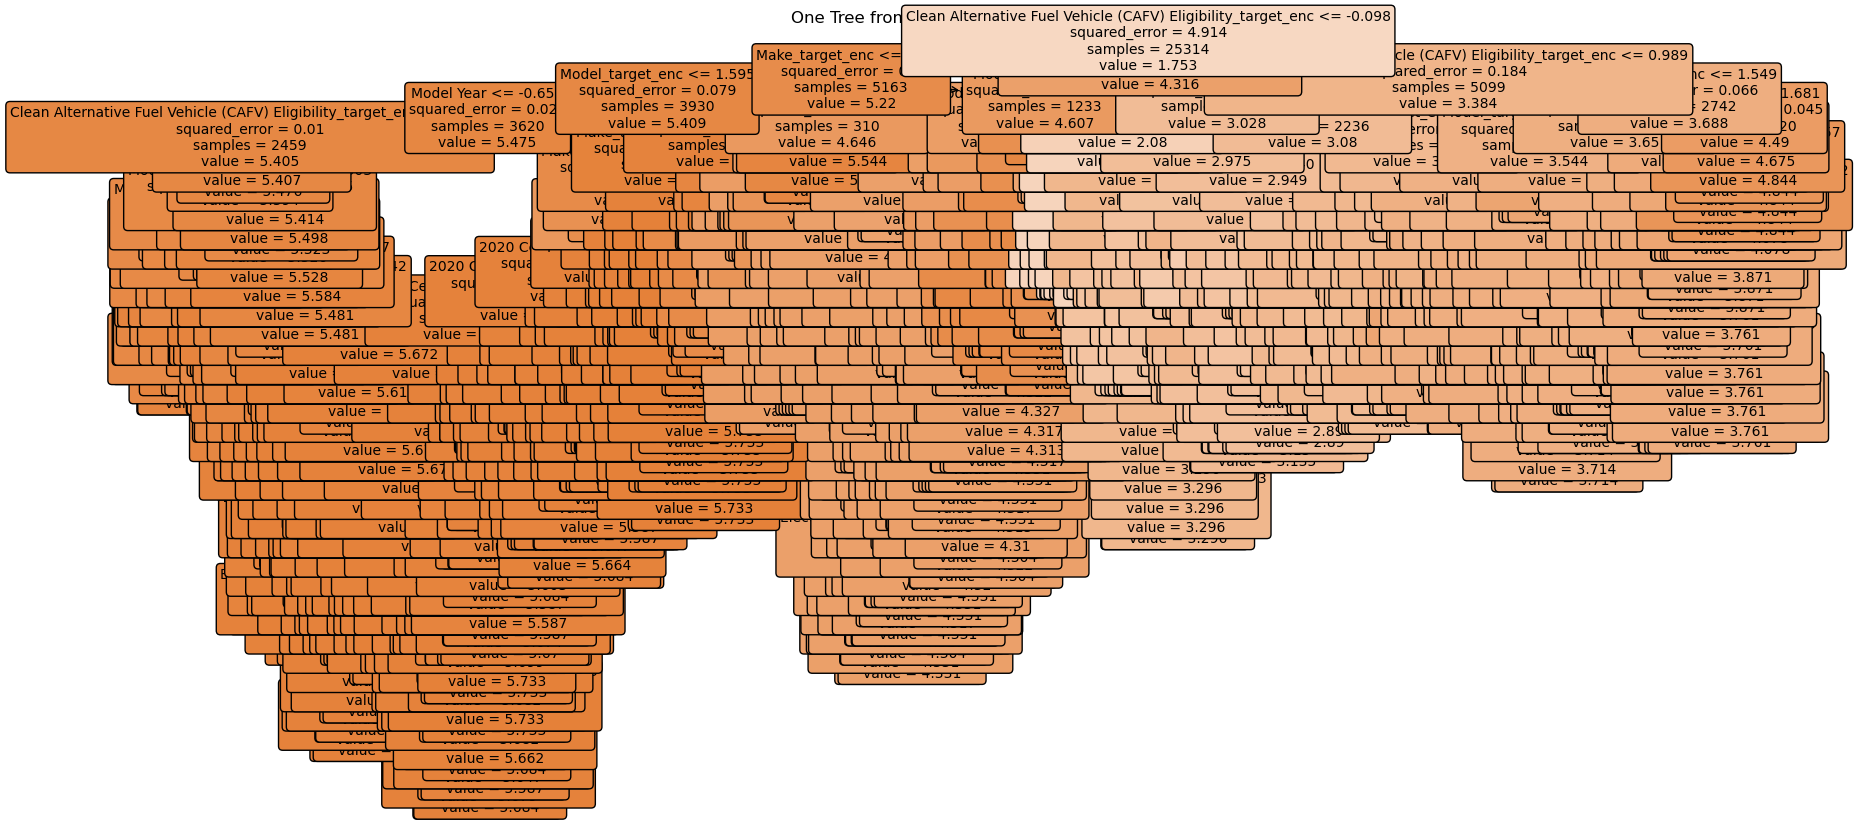

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import matplotlib.pyplot as plt

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Plot one tree from the Random Forest
plt.figure(figsize=(20, 10))
tree.plot_tree(
    rf_model.estimators_[0],  # visualize the first tree
    filled=True,
    feature_names=df.drop(columns=['Electric Range']).columns,
    rounded=True,
    fontsize=10
)
plt.title("One Tree from the Random Forest Regressor")
plt.show()


**HYPERPARAMETER TUNING**

Hyperparameter tuning is the process of selecting the best set of hyperparameters to optimize a machine learning model's performance. Unlike model parameters (learned from data), hyperparameters are set manually before training.

I am selecting best-performing model for hyperparameter tuning.

In [141]:
# Define hyperparameter space for Random Forest
param_dist = { 
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20), 
    'min_samples_leaf': randint(1, 20), 
    'random_state': [42],
}

# Randomized Search with RandomForestRegressor
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train_scaled, y_train)

# Output best parameters
print("Best Params (Random Search):", random_search.best_params_)


Best Params (Random Search): {'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 17, 'n_estimators': 64, 'random_state': 42}


In [142]:
best_params= random_search.best_params_

In [149]:
# Best model after RandomizedSearchCV
best_rf = random_search.best_estimator_
# Predictions
y_pred = best_rf.predict(X_test_scaled)

In [193]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9996
MAE: 0.0038
MSE: 0.0022
RMSE: 0.0466


SAVE THE MODEL

In [195]:
from sklearn.pipeline import Pipeline
joblib.dump(rf_new,"Electric vehicle range prediction model.joblib")
print("model saved sucessfully.")

model saved sucessfully.


# Pipeline building

A machine learning pipeline was implemented to automate data preprocessing, feature selection, and model training, ensuring efficiency and reproducibility.

In [197]:
# Build pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(**best_params))
])

In [199]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predicting on test data
predictions = pipeline.predict(X_test)

In [201]:
# Saving the Pipeline
joblib.dump(pipeline, 'Electric_vehicle_range_pipeline.joblib')
print("Pipeline saved successfully!")

Pipeline saved successfully!


TEST WITH UNSEEN DATA

In [203]:
pipeline = joblib.load("Electric vehicle range prediction model.joblib")

In [205]:
# Loading the unseen data
unseen_df = pd.read_excel("unseen data - Copy.xlsx")
unseen_df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
0,Thurston,Olympia,WA,98502,2015,TESLA,MODEL Y,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,80,87000,22,PUGET SOUND ENERGY INC,53067010520
1,Thurston,Olympia,WA,98512,2022,CHEVROLET,VOLT,'Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,53,64000,35,PUGET SOUND ENERGY INC,53067011810
2,Kitsap,Poulsbo,WA,98370,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,50,120000,23,PUGET SOUND ENERGY INC,53035940100
3,King,Bothell,WA,98011,2023,TESLA,MODEL 3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,215,870000,1,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033022102
4,Yakima,Yakima,WA,98902,2017,TESLA,MODEL 3,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,70,45000,14,PACIFICORP,53077000500


In [207]:
unseen_df.shape

(20, 14)

In [209]:
unseen_df.info

<bound method DataFrame.info of        County          City State  Postal Code  Model Year       Make  \
0    Thurston       Olympia    WA        98502        2015      TESLA   
1    Thurston       Olympia    WA        98512        2022  CHEVROLET   
2      Kitsap       Poulsbo    WA        98370        2024        BMW   
3        King       Bothell    WA        98011        2023      TESLA   
4      Yakima        Yakima    WA        98902        2017      TESLA   
5        King       Bothell    WA        98011        2019  CHEVROLET   
6   Snohomish       Bothell    WA        98012        2021      TESLA   
7        King        Seatac    WA        98188        2015       FIAT   
8      Kitsap    Silverdale    WA        98383        2024        KIA   
9      Kitsap       Poulsbo    WA        98370        2023  CHEVROLET   
10  Snohomish       Bothell    WA        98012        2022      TESLA   
11     Yakima        Yakima    WA        98908        2024    LINCOLN   
12     Kitsap     B

In [211]:
# Target Encoding

categorical_columns = unseen_df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical_columns:", categorical_columns)

# Target encoding for each categorical column
for col in categorical_columns:
    # Calculate mean of target for each category
    target_mean = unseen_df.groupby(col)['Electric Range'].mean()
    # Map the mean target to the original column
    unseen_df[col + '_target_enc'] = unseen_df[col].map(target_mean)

unseen_df.head()

Categorical_columns: ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']


,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,...,Electric Utility,2020 Census Tract,County_target_enc,City_target_enc,State_target_enc,Make_target_enc,Model_target_enc,Electric Vehicle Type_target_enc,Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc,Electric Utility_target_enc
0,Thurston,Olympia,WA,98502,2015,TESLA,MODEL Y,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,80,...,PUGET SOUND ENERGY INC,53067010520,65.75,65.75,110.8,165.142857,75.000000,70.333333,66.428571,107.461538
1,Thurston,Olympia,WA,98512,2022,CHEVROLET,VOLT,'Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,53,...,PUGET SOUND ENERGY INC,53067011810,65.75,65.75,110.8,62.666667,53.000000,70.333333,134.692308,107.461538
2,Kitsap,Poulsbo,WA,98370,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,50,...,PUGET SOUND ENERGY INC,53035940100,78.60,51.50,110.8,50.000000,50.000000,115.600000,134.692308,107.461538
3,King,Bothell,WA,98011,2023,TESLA,MODEL 3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,215,...,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033022102,127.00,143.75,110.8,165.142857,168.333333,115.600000,134.692308,127.000000
4,Yakima,Yakima,WA,98902,2017,TESLA,MODEL 3,'Battery Electric Vehicle (BEV),Not eligible due to low battery range,70,...,PACIFICORP,53077000500,121.60,121.60,110.8,165.142857,168.333333,70.333333,66.428571,109.500000


In [213]:
unseen_df.shape

(20, 22)

In [215]:
# Drop irrelevant columns
columns_to_drop = ['County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility']
unseen_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [217]:
unseen_df.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract,County_target_enc,City_target_enc,State_target_enc,Make_target_enc,Model_target_enc,Electric Vehicle Type_target_enc,Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc,Electric Utility_target_enc
0,98502,2015,80,87000,22,53067010520,65.75,65.75,110.8,165.142857,75.000000,70.333333,66.428571,107.461538
1,98512,2022,53,64000,35,53067011810,65.75,65.75,110.8,62.666667,53.000000,70.333333,134.692308,107.461538
2,98370,2024,50,120000,23,53035940100,78.60,51.50,110.8,50.000000,50.000000,115.600000,134.692308,107.461538
3,98011,2023,215,870000,1,53033022102,127.00,143.75,110.8,165.142857,168.333333,115.600000,134.692308,127.000000
4,98902,2017,70,45000,14,53077000500,121.60,121.60,110.8,165.142857,168.333333,70.333333,66.428571,109.500000


In [219]:
unseen_df.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', '2020 Census Tract', 'County_target_enc',
       'City_target_enc', 'State_target_enc', 'Make_target_enc',
       'Model_target_enc', 'Electric Vehicle Type_target_enc',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc',
       'Electric Utility_target_enc'],
      dtype='object')

In [221]:
#Testing with Unseen Data
# Load the saved pipeline
loaded_pipe = joblib.load('Electric_vehicle_range_pipeline.joblib')

X_unseen = unseen_df.drop(columns=["Electric Range"])  # Features
y_true = unseen_df["Electric Range"]  # Target

# Make predictions on the test data
y_pred = loaded_pipe.predict(X_unseen )

# Optionally, add predictions to the DataFrame
unseen_df['predicted_Electric Range'] = y_pred


In [223]:
unseen_df

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,2020 Census Tract,County_target_enc,City_target_enc,State_target_enc,Make_target_enc,Model_target_enc,Electric Vehicle Type_target_enc,Clean Alternative Fuel Vehicle (CAFV) Eligibility_target_enc,Electric Utility_target_enc,predicted_Electric Range
0,98502,2015,80,87000,22,53067010520,65.750000,65.75,110.8,165.142857,75.000000,70.333333,66.428571,107.461538,4.848689
1,98512,2022,53,64000,35,53067011810,65.750000,65.75,110.8,62.666667,53.000000,70.333333,134.692308,107.461538,4.848689
2,98370,2024,50,120000,23,53035940100,78.600000,51.50,110.8,50.000000,50.000000,115.600000,134.692308,107.461538,4.848689
3,98011,2023,215,870000,1,53033022102,127.000000,143.75,110.8,165.142857,168.333333,115.600000,134.692308,127.000000,4.848749
4,98902,2017,70,45000,14,53077000500,121.600000,121.60,110.8,165.142857,168.333333,70.333333,66.428571,109.500000,4.848689
5,98011,2019,82,35000,1,53033021803,127.000000,143.75,110.8,62.666667,82.000000,70.333333,134.692308,127.000000,4.850679
6,98012,2021,208,78000,1,53061052009,190.333333,143.75,110.8,165.142857,208.000000,115.600000,134.692308,107.461538,4.846312
7,98188,2015,84,98000,33,53033028802,127.000000,84.00,110.8,84.000000,84.000000,70.333333,134.692308,127.000000,4.848689
8,98383,2024,60,100000,23,53035090400,78.600000,60.00,110.8,71.000000,60.000000,135.111111,134.692308,107.461538,4.848689
9,98370,2023,53,99000,23,53035091100,78.600000,51.50,110.8,62.666667,53.000000,70.333333,134.692308,107.461538,4.848689


**CONCLUSION** :

• The Random Forest Regressor achieved the highest performance among all five models with 99% accuracy, demonstrating strong predictive capability for estimating electric vehicle range.

• When evaluated on unseen data, it maintained high accuracy, indicating robust generalization and effective pattern recognition.

• The dataset was clean and well-prepared, with no missing values or duplicates.

• Preprocessing techniques such as feature encoding and scaling contributed to all models achieving over 95% accuracy.

• Hyperparameter tuning had minimal impact on the performance of the Random Forest Regressor, implying it was already well-optimized.

**FUTURE WORK:**

• Model Maintenance: Regularly refresh the model using recent data to help it stay responsive to evolving trends and user behavior.

• Enhanced Feature Design: Explore the creation of new features or refinement of current ones to uncover deeper insights and improve the model’s predictive performance.

In [ ]:
**The Best Model**

The Random Forest Regressor model, with an accuracy of 99 %, has been saved as "Electric vehicle range prediction model.joblib" for future use.

**The End**